In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [23]:
End = '2017-01-05'

In [24]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [25]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [26]:
if Min_pozycja < Max_pozycja and Max_pozycja > len(df1)-20:
    
    # Trend L1 wzrostowy, liczony od połowy wykresu
    End = pd.to_datetime(End)
    Start = (End - timedelta(days=150))
    df1 = df.loc[Start:End]
    df1.index = df1.index.map(mdates.date2num)
    
    Min_pozycja = df1['Low'].argmin()
    Max_pozycja = df1['High'].argmax()
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a + b
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df11['Pozycja na LT'] = df11.index * a + b
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  W ostatnich 20 dniach')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - wzrostowy')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                

        X_long = [Ax, Bx]
        Y_long = [Ay, By]
        
# Trend M1 - styczna pomocnicza od L1 i M2 styczna porządana od M2        
        
    Ax = Bx
    Ay = By
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df21 = df1[A[0]:Max_idx]
    df21['Pozycja na LT'] = df21.index * a + b
    df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']>=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df1[B[0]:Max_idx]
        Bx = df21.iloc[0].name
        By = df21['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df21['Pozycja na LT'] = df21.index * a + b
        df21['check']= round(df21['Low'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']>=0].count()
        sum = len(df21['check'])

        if good == sum:
            
            print('TREND M1 - pomocniczy')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego')
            print(f'Punkt A:{A}, Punkt B: {B}')
            print('------------------------------------------------------------------------------')
            break
            
        else:
            df21=df1[B[0]+1:Max_idx]
            Bx = df21.iloc[0].name
            By = df21['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx

            X_mid1 = [Ax, Bx]
            Y_mid1 = [Ay, By]
            
# Trend krótki M2            
            
    Ax = Bx
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df31 = df1[A[0]:Max_idx]
    df31['Pozycja na LT'] = df31.index * a + b
    df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
    good = df31['check'][df31['check']>=0].count()
    sum = len(df31['check'])
    
    for i in range(len(df21)):
        
        df31=df1[B[0]:Max_idx]
        Bx = df31.iloc[0].name
        By = df31['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']>=0].count()
        sum = len(df31['check'])

        if good == sum:
            
            print('TREND M2')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M2 wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df31=df1[B[0]+1:Max_idx]
            Bx = df31.iloc[1].name
            By = df31['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            

            X_mid2 = [Ax, Bx]
            Y_mid2 = [Ay, By]
            
            
            
            
# Trend krótki M3

    Ax = Bx
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = Ax
    By = Ax
    B = [Bx, By]
    
    a = (Ay-By)/(Ax-Bx)
    b = By - a*Bx
    
    df31 = df1[A[0]:Max_idx]
    df31['Pozycja na LT'] = df31.index * a + b
    df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
    good = df31['check'][df31['check']>=0].count()
    sum = len(df31['check'])
    
    for i in range(len(df21)):
        
        df31=df1[B[0]:Max_idx]
        Bx = df31.iloc[0].name
        By = df31['Low'].loc[Bx]
        B = [Bx, By]

        a = (Ay-By)/(Ax-Bx)
        b = By - a*Bx

        df31['Pozycja na LT'] = df31.index * a + b
        df31['check']= round(df31['Low'] - df31['Pozycja na LT'],0)
        good = df31['check'][df31['check']>=0].count()
        sum = len(df31['check'])

        if good == sum:
            print('------------------------------------------------------------------------------')
            print('TREND M2')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu M2 wzrostowego')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df31=df1[B[0]+1:Max_idx]
            Bx = df31.iloc[1].name
            By = df31['Low'].loc[Bx]
            B = [Bx, By]

            a = (Ay-By)/(Ax-Bx)
            b = By - a*Bx
                
            Cx = df1.index.max()+5
            Cy = a*Cx +b
            C = [Cx, Cy]

            X_mid3 = [Ax, Cx]
            Y_mid3 = [Ay, Cy]
    
        


Pierwszy trend:  Wzrostowy
Max/Min:  W ostatnich 20 dniach
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu L1 - wzrostowy
Punkt A:[17028.0, 563.23999], Punkt B: [17046.0, 570.810974]
------------------------------------------------------------------------------
TREND M1 - pomocniczy
Znaleziona 2 punkty przez które można przeprowadzić linie trendu M1 wzrostowego
Punkt A:[17046.0, 570.810974], Punkt B: [17079.0, 609.617004]
------------------------------------------------------------------------------
TREND M2
Znaleziona 2 punkty przez które można przeprowadzić linie trendu M2 wzrostowego
Punkt A:[17079.0, 609.617004], Punkt C: [17176.0, 716.5100340000026]
TREND M2
Znaleziona 2 punkty przez które można przeprowadzić linie trendu M2 wzrostowego
Punkt A:[17081.0, 611.820984], Punkt C: [17176.0, 739.8876747142858]


In [31]:
df1.iloc[-1]['Low']

910.416992

In [27]:
df1.reset_index(inplace = True)

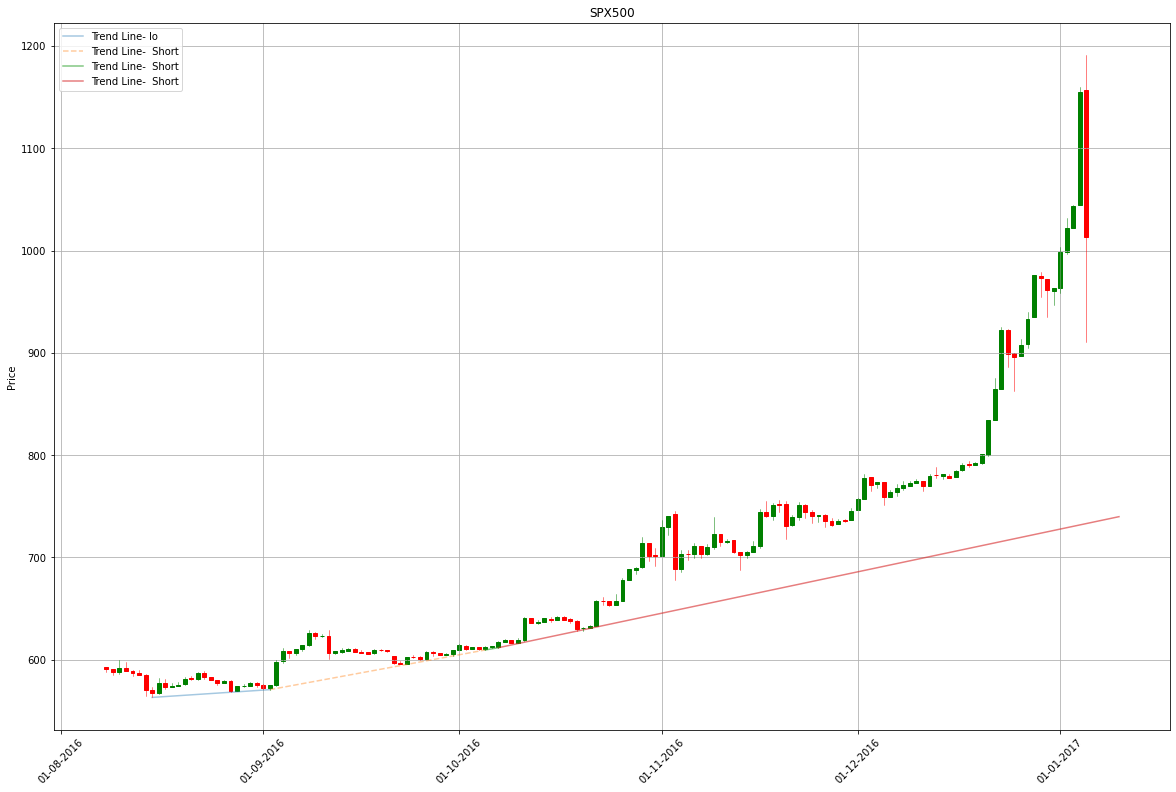

In [33]:
fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.plot(X_long, Y_long, label='Trend Line- lo', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, '--', label='Trend Line-  Short', alpha = 0.4)
ax2.plot(X_mid2, Y_mid2, label='Trend Line-  Short', alpha = 0.6)
ax2.plot(X_mid3, Y_mid3, label='Trend Line-  Short', alpha = 0.6)

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
plt.show()